<a href="https://colab.research.google.com/github/Pragna235/Clustering/blob/main/Copy_of_Customer_Segmentation_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation using KMeans Clustering

### Unsupervised Learning Project

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the Data

In [3]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Of all the attributes, `Gender` attribute is categorical.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [8]:
X = df.iloc[:,[3,4]].values

In [9]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

We'll use these two columns `Annual Income` and `Spending Score` for customer segmentation.

### Perform Elbow Method to find Optimal no. of Clusters

Elbow method is used to find optimal no. of clusters or k value for any unsupervised learning algorithm.

In [10]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of square

wcss is indirectly proportional to k

In [11]:
for i in range(1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0) #init = initializer
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

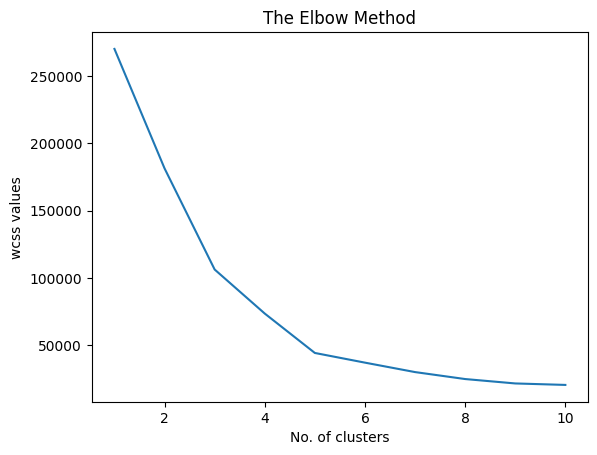

In [12]:
plt.plot(range(1,11),wcss)
plt.title("The Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("wcss values")
plt.show()

We are getting an elbow at k=5. So, the optimal number of clusters = 5

### K-Means Algorithm

In [13]:
kmeansmodel = KMeans(n_clusters=5,init = "k-means++",random_state=0)

In [14]:
y_kmeans = kmeansmodel.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

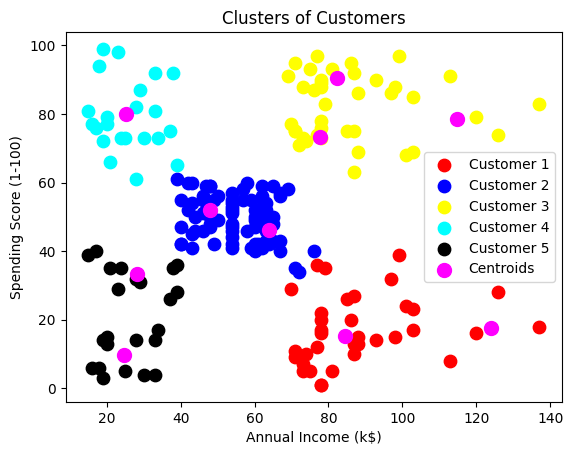

In [15]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=80,c="red",label="Customer 1")
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=80,c="blue",label="Customer 2")
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=80,c="yellow",label="Customer 3")
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=80,c="cyan",label="Customer 4")
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1],s=80,c="black",label="Customer 5")

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# DBSAN Algorithm

In [16]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5,min_samples=5)

In [17]:
labels = dbscan.fit_predict(X)

In [18]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

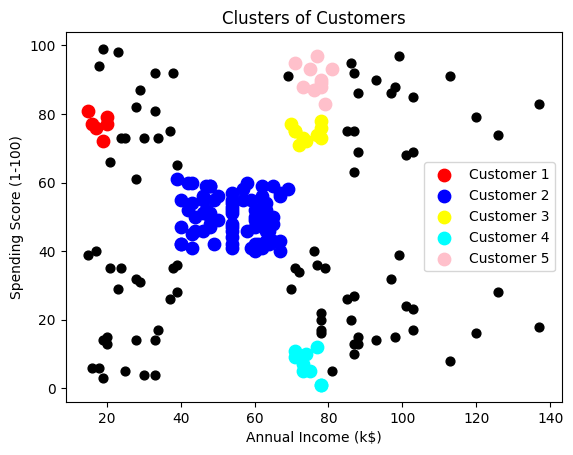

In [38]:
plt.scatter(X[labels == -1,0], X[labels==-1,1],s=40,c='black')

plt.scatter(X[labels==0,0],X[labels==0,1],s=80,c="red",label="Customer 1")
plt.scatter(X[labels==1,0],X[labels==1,1],s=80,c="blue",label="Customer 2")
plt.scatter(X[labels==2,0],X[labels==2,1],s=80,c="yellow",label="Customer 3")
plt.scatter(X[labels==3,0],X[labels==3,1],s=80,c="cyan",label="Customer 4")
plt.scatter(X[labels==4,0],X[labels==4,1],s=80,c="pink",label="Customer 5")


plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# Agglomerative Clustering

In [30]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

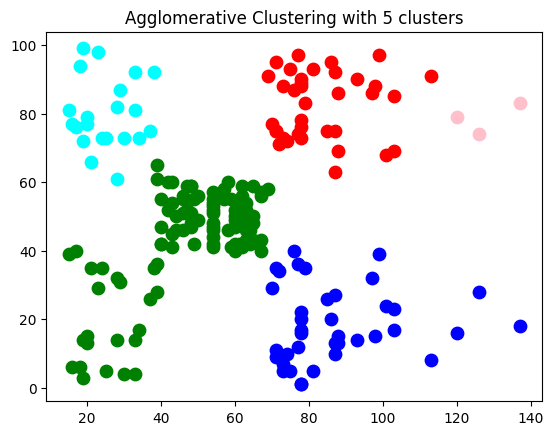

In [48]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=5,linkage='average')
label = agglomerative.fit_predict(X)

#plt.scatter(X[label == -1,0], X[label==-1,1],s=40,c='black')

plt.scatter(X[label==0,0],X[label==0,1],s=80,c="blue",label="Customer 1")
plt.scatter(X[label==1,0],X[label==1,1],s=80,c="green",label="Customer 2")
plt.scatter(X[label==2,0],X[label==2,1],s=80,c="red",label="Customer 3")
plt.scatter(X[label==3,0],X[label==3,1],s=80,c="cyan",label="Customer 4")
plt.scatter(X[label==4,0],X[label==4,1],s=80,c="pink",label="Customer 5")



plt.title('Agglomerative Clustering with 5 clusters')
plt.show()

In [43]:
np.unique(label)

array([0, 1, 2, 3, 4])